# **Linear Algebra** 





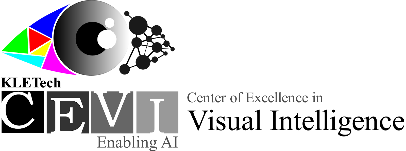

 
06/07/2022 <br>
code by Tejas Anvekar <br>
Speaker Tejas Anvekar


## General Linear Systems

Before we begin to examine the vector space $\mathbb{R}^n$, it is important to make come conclusions about linear systems in general so that we will be prepared to answer some of the questions that arise.
For any linear system, exactly one of the following statements is true:

1. The system has no solutions.  (It is inconsistent.)
2. The system has a unique solution.
3. The system has an infinite collection of solutions.

The objective of this section is to determine which of these three statements applies to a given system. The focus in the previous chapter was on systems that had unique solutions.  We begin to explore the other possibilities in more detail.  We also consider the more general case of a linear system with $m$ equations and $n$ unknowns, rather that the special case of systems that have an equal number of equations and unknowns.  The use of elimination on the associated augmented matrices will again prove to be very useful.    

### Reduced row echelon form

In the previous chapter we discussed elimination, a method for using row operations to reduce a system to simpler system with the same solution.  We will now extend that idea further, using row operations to produce an equivalent system that is simpler still.  To do this we will apply row operations to a matrix until it is in a standard form known as **reduced row echelon form**.

A matrix in reduced row echelon form (RREF) has the following properties.
- The first nonzero entry in each row is a 1.  These entries are again called the **pivots**.
- Each pivot is located to the right of the pivots in all rows above it.
- The entries above and below each pivot are 0.
- Rows that are all zeros are located below other rows. 

Here are some examples of matrices that are in reduced row echelon form.
   
   
$$
\begin{equation}
\left[ \begin{array}{cccc} 1 & 0 & 0 & * \\ 0 & 1 & 0 & * \\ 0 & 0 & 1 & * \end{array}\right]
\end{equation}
$$

   
$$
\begin{equation}
\left[ \begin{array}{ccccc} 1 & 0 & * & 0 & *  \\ 0 & 1 & * & 0 & * 
\\ 0 & 0 & 0 & 1 & * \\ 0 & 0 & 0 & 0 & 0 \end{array}\right]
\end{equation}
$$

$$
\begin{equation}
\left[ \begin{array}{cccccc} 1 & * & 0 & 0 & * & * \\ 0 & 0 & 1 & 0 & * & * \\ 0 & 0 & 0 & 1 & * & * \end{array}\right]
\end{equation}
$$

The difference between RREF and the row echelon form we used earlier is that columns containing pivots are all zero except for the pivot itself.  It is also imporant to remember that there can be at most one pivot in each row, and at most one pivot in each column.

We will make use of the function $\texttt{FullRowReduction}$ in the $\texttt{laguide}$ module for the calculations.  Try it out for some matrices made up of random integers.  Experiment by using matrices with different shapes.

In [1]:
import numpy as np
import laguide as lag

C = np.random.randint(-2,3,size=(3,5))
C_reduced = lag.FullRowReduction(C)

print(C)
print('\n')
print(C_reduced)


[[-2  2  1 -1 -2]
 [ 1 -1  1  2 -1]
 [ 2 -2  2  1  0]]


[[ 1.         -1.          0.          0.          1.        ]
 [ 0.          0.          1.          0.         -0.66666667]
 [ 0.          0.          0.          1.         -0.66666667]]


### Pivot positions and free variables

We first look at how the RREF of the *augmented coefficient matrix* can be used to help us write the solution to a system in the presence of **free variables**.  Free variables are those that are not uniquely determined by the system.

Let's consider the following system as an example.

$$
\begin{eqnarray*}
-2x_1 + 2x_2 - 2x_3 + 2x_4& = & 0\\
x_1 - 2x_2 -2x_3 \hspace{1.2cm}& = & -1\\
x_1 \hspace{1.2cm} + 2x_3 -2x_4 & = & 1
\end{eqnarray*}
$$


In [75]:
B_augmented = np.array([[-2,2,-2,2,0],[1,-2,-2,0,-1],[1,0,2,-2,1]])
B_augmented_reduced = lag.FullRowReduction(B_augmented)
print(B_augmented_reduced)

[[ 1.  0.  0. -2.  1.]
 [ 0.  1.  0. -1.  1.]
 [-0. -0.  1. -0. -0.]]


Now we look at the system that is represented by the RREF.

$$
\begin{eqnarray*}
x_1 \quad\quad\quad\quad -2x_4& = & 1\\
 x_2 \quad\quad -x_4 & = & 1\\
x_3 \quad\quad & = & 0
\end{eqnarray*}
$$

We see that $x_3 = 0$, and the other variables are related to each other through the first two equations.  This means that the value of $x_3$ is uniquely determined by the system, while the values of the other variables are not.  In order to complete a solution we must choose a value for either one of $x_1$, $x_2$, or $x_4$, and then use the first two equations to calculate values for the other two variables.  In order to be systematic, and to make the most efficient use of the RREF, we will always choose the free variables to be those that correspond to the columns in the array that do not contain a pivots.  In this case $x_4$ will be the free variable since the fourth column does not have a pivot.  Now if we choose $x_4 = 2$, we can determine that $x_1=5$ and $x_2 = 3$.  It is important to realize that $x_4$ can take on *any value*.  Values for $x_1$ and $x_2$ can then be calculated to complete a solution to the system.

We might pause here to consider how to describe *all possible solutions* to this system.  One idea is to assign a parameter to the free variables, say $x_4 = s$, and then express the other variables in terms of the parameters.


$$
\begin{eqnarray*}
x_1 & = & 1 + 2s\\
 x_2  & = & 1 + s\\
x_3 & = & 0 \\
x_4 & = & s
\end{eqnarray*}
$$

The important point is that **a linear system will have an infinite number of solutions if it contains one or more free variables.**  The RREF is useful because we can tell at a glance if there are free variables.  If any columns are lacking a pivot, there are free variables in the system, which means that the system does not have a unique solution.

### Pivot positions and inconsistent systems

We now turn our attention to the problem of determining if a linear system is consistent.  Again we will look at a specific example and make use of the RREF of the augmented coefficient matrix.

$$
\begin{eqnarray*}
x_1 - 2x_2 + 2x_3 & = & 0\\
2x_1 + 2x_2 + 2x_3  & = & 1\\
-x_2 - x_3 & = & -2 \\
-2x_1 -x_2 - x_3 & = & 0
\end{eqnarray*}
$$


In [2]:
D_augmented = np.array([[1,-2,2,0],[2,2,2,1],[0,-1,-1,-2],[-2,-1,-1,0]])
D_augmented_reduced = lag.FullRowReduction(D_augmented)
print(D_augmented_reduced)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


When we write the system represented by the RREF, we see clearly that the system has no solution.  (*Remember that the final column in the augmented coefficient matrix represents the right-hand sides of the equations.*)


$$
\begin{eqnarray*}
x_1 & = & 0\\
 x_2  & = & 0\\
x_3 & = & 0 \\
0 & = & 1
\end{eqnarray*}
$$

We should be careful in our interpretation of the RREF in this case.  We might be tempted to conclude that setting $x_1 = x_2 = x_3 = 0$ satisfies three of the equations, but leaves one equation unsatisfied.  If we look back at the original system though, we can see that this is not the case.  Setting $x_1 = x_2 = x_3 = 0$ only satisfies the first and last equations.


Again, we want to draw a connection between pivot positions and our conclusion that the system is inconsistent.  An inconsistency arises if all the coefficients in a particular row are zero, but the right-hand side is nonzero.  In terms of pivots, this means that **a linear system is inconsistent if there is a pivot in the last column of the augmented matrix**.

### Pivot positions and unique solutions

In the final example we consider the familar case where the system has a unique solution, and again consider 
the RREF of the associated augmented matrix.

$$
\begin{eqnarray*}
x_1 - 2x_2 + 2x_3 & = & 0\\
-x_2 - x_3 & = & -2 \\
-2x_1 -x_2 - x_3 & = & 0
\end{eqnarray*}
$$


In [4]:
G_augmented = np.array([[1,-2,2,0],[0,-1,-1,-2],[-2,-1,-1,0]])
G_augmented_reduced = lag.FullRowReduction(G_augmented)
print(G_augmented_reduced)

[[ 1.    0.    0.   -1.  ]
 [ 0.    1.    0.    0.75]
 [ 0.    0.    1.    1.25]]


The fully reduced augmented matrix now gives the unique solution to the system directly.

$$
\begin{eqnarray*}
x_1 & = & -1\\
 x_2  & = & 0.75\\
x_3 & = & 1.25
\end{eqnarray*}
$$

It is important to realize that there is a system has unique solution exactly when *the previous two cases do not occcur*.  To state this explicitly, a **system will have a unique solution when the augmented matrix has a pivot in every column except for the last**.  

    
### Pivot positions and system analysis

We now summarize the solution sets for a system $AX=B$, based on the positions of pivots in the $m\times(n+1)$ augmented matrix $[A|B]$.  These pivot positions are revealed by computing the RREF.

- If $[A|B]$ has a pivot in the last column, the system has no solution.
- If any of the first $n$ columns of $[A|B]$ *do not* have a pivot, the system does not have a unique solution due to the existence of a free variable.
- If $[A|B]$ has a pivot in each column *except the last*, then the system has a unique solution.

With these three statements we can determine if any given system $AX=B$ has a unique solution, has infinite number of solutions, or has no solution at all.  This way of categorizing linear systems will be important for upcoming discussions.

### Exercises

**Exercise 1:** Determine the number of solutions to the following system, then find all possible solutions.

$$
\begin{eqnarray*}
5x_1 + 4x_2 - x_3 & = & \hspace{0.3cm} 3\\
x_1 \hspace{1.2cm} + x_3  & = & \hspace{0.3cm} 2\\
-2x_1 + 2x_2 + 4x_3 & = & -3 \\
x_1 + 8x_2 + 7x_3 & = & -3 \\
3x_1 \hspace{1.2cm} - 3x_3 & = & \hspace{0.3cm} 3 \\
\end{eqnarray*}
$$

In [ ]:
## Code solution here.

**Exercise 2:** Determine the number of solutions to the following system, then find all possible solutions.


$$
\begin{eqnarray*}
5x_1 + 4x_2 - x_3 & = & \hspace{0.3cm} 0\\
x_1 \hspace{1.2cm} + x_3  & = & \hspace{0.3cm} 2\\
-2x_1 + 2x_2 + 4x_3 & = & -3 \\
x_1 + 8x_2 + 7x_3 & = & -3 \\
3x_1 \hspace{1.2cm} - 3x_3 & = & \hspace{0.3cm} 3 \\
\end{eqnarray*}
$$

In [ ]:
## Code solution here.

**Exercise 3:** Determine the number of solutions to the following system, then find all possible solutions.

$$
\begin{eqnarray*}
5x_1 + 4x_2 - x_3 & = & \hspace{0.3cm} 3\\
x_1  +2x_2 + x_3  & = & \hspace{0.3cm} 0\\
-2x_1 + 2x_2 + 4x_3 & = & -3 \\
x_1 + 8x_2 + 7x_3 & = & -3 \\
3x_1 \hspace{1.2cm} - 3x_3 & = & \hspace{0.3cm} 3 \\
\end{eqnarray*}
$$

In [ ]:
## Code solution here.

**Exercise 4:** Construct an example of an inconsistent system with 2 equations and 4 unknowns.  Check your example by using $\texttt{FullRowReduction}$

In [ ]:
## Code solution here.

**Exercise 5:** Explain why it is not possible for a system with 2 equations and 4 unknowns to have a unique solution.  Base your argument on pivot positions.

**Exercise 6:** Write a function that accepts the augmented matrix for a system and returns the number of free variables in that system.  Make use of $\texttt{FullRowReduction}$ in the $\texttt{laguide}$ module. 

**Exercise 7:** Write a function that accepts the augmented matrix for a system and returns whether or not that system is consistent.  The function should return the value 1 if the system is consistent or the value 0 if the system is inconsistent.  Make use of $\texttt{FullRowReduction}$ in the $\texttt{laguide}$ module. 

In [4]:
## Code solution here.